# EN2550: Assignment 03 on Object Counting on a Conveyor Belt<a href="#EN2550:-Assignment-03-on-Object-Counting-on-a-Conveyor-Belt" class="anchor-link">¶</a>

## Connected Component Analysis<a href="#Connected-Component-Analysis" class="anchor-link">¶</a>

In this part, we will generate an indexed image representing connected
components in `conveyor_f101.png` image. Notice that, as there are three
square nuts and one hexagonal nut in the image, there will be five
connected components (backgound will be assigned the label 0).

1.  Open the `hexnut_template.png`, `squarenut_template.png` and
    `conveyor_f100.png` and display. This is done for you.









    



   


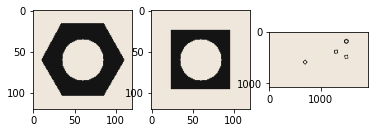

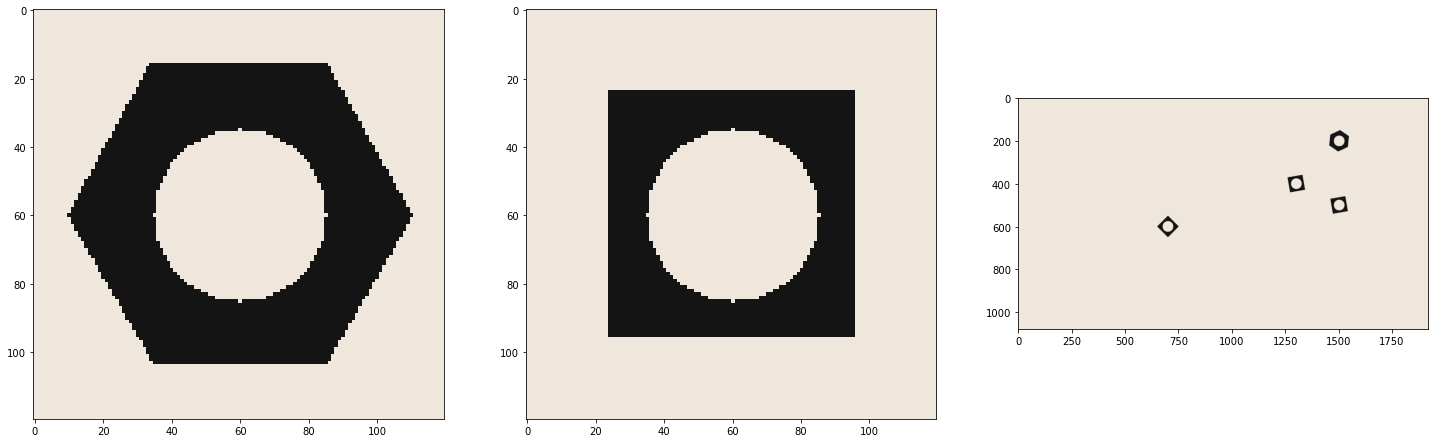

In [1]:

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3, figsize = (25,10))
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()


1.  Convert the images to grayscale and apply Otsu's thresholding to
    obtain the binarized image. Do this for both the templates and belt
    images. See
    <https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html>
    for a guide. State the threshold value (automatically) selected in
    the operation. Display the output images.

Threshold value for hexnut image: 20.0
Threshold value for square image: 20.0
Threshold value for conveyor image: 20.0


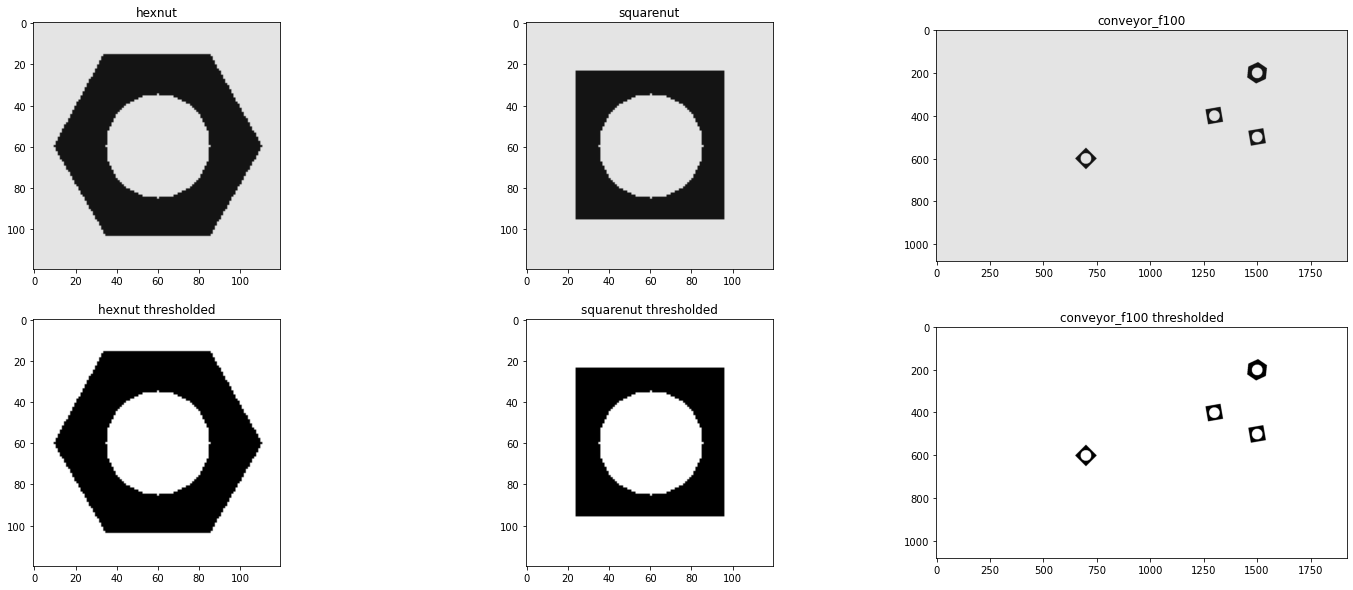

In [2]:
hexnut_gray = cv.cvtColor(hexnut_template, cv.COLOR_RGB2GRAY)
squarenut_gray = cv.cvtColor(squarenut_template, cv.COLOR_RGB2GRAY)
conveyor100_gray = cv.cvtColor(conveyor_f100, cv.COLOR_RGB2GRAY)

#Otsu's thresholding
ret1,th1 = cv.threshold(hexnut_gray ,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret2,th2 = cv.threshold(squarenut_gray ,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret3,th3 = cv.threshold(conveyor100_gray ,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

images = [[hexnut_gray, th1],[squarenut_gray,th2],[conveyor100_gray,th3]]
titles = [['hexnut', 'hexnut thresholded'],['squarenut', 'squarenut thresholded'], ['conveyor_f100', 'conveyor_f100 thresholded']]

fig, ax = plt. subplots(2,3, figsize = (25,10))
for i in range(2):
    ax[i][0].imshow(cv.cvtColor(images[0][i] , cv.COLOR_GRAY2BGR))
    ax[i][1].imshow(cv.cvtColor(images[1][i] , cv.COLOR_GRAY2BGR))
    ax[i][2].imshow(cv.cvtColor(images[2][i] , cv.COLOR_GRAY2BGR))

    ax[i][0].set_title(titles[0][i])
    ax[i][1].set_title(titles[1][i])
    ax[i][2].set_title(titles[2][i])

print('Threshold value for hexnut image:',ret1)
print('Threshold value for square image:',ret2)
print('Threshold value for conveyor image:',ret3)



1.  Carry out morphological closing to remove small holes inside the
    foreground. Use a $3\times3$ kernel. See
    <https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html>
    for a guide.

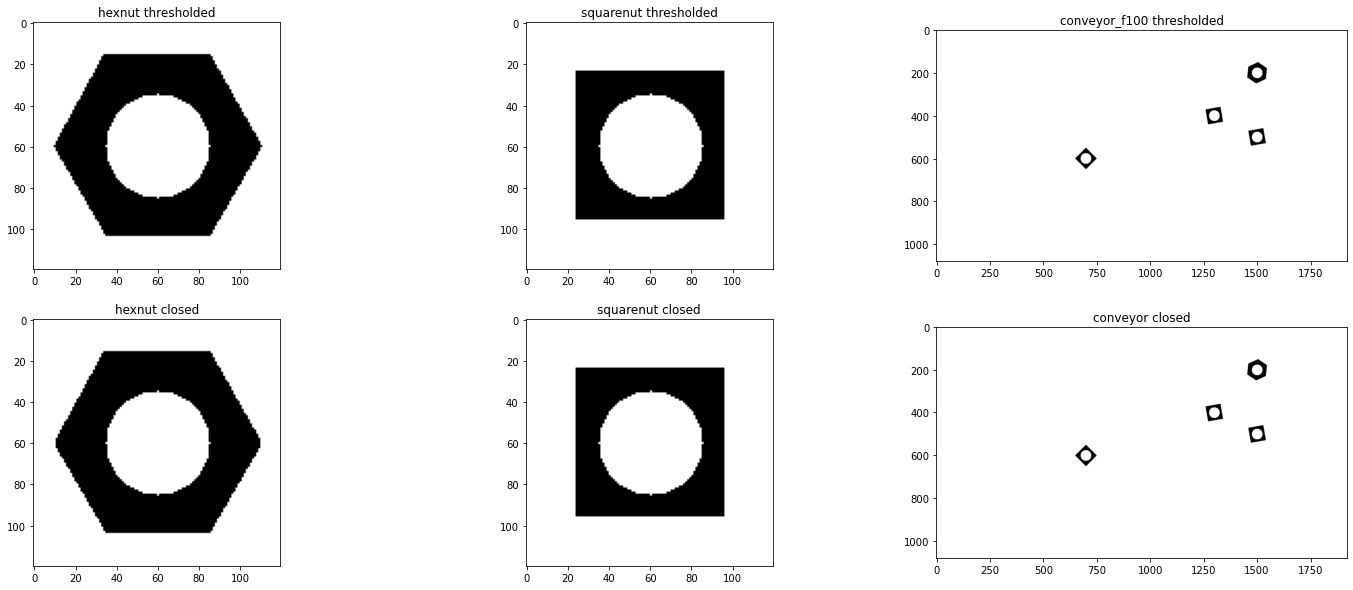

In [3]:
kernel = np.ones((3,3),np.uint8)

hexnut_closed = cv.morphologyEx(th1, cv.MORPH_CLOSE, kernel)
squarenut_closed = cv.morphologyEx(th2, cv.MORPH_CLOSE, kernel)
conveyor_closed = cv.morphologyEx(th3, cv.MORPH_CLOSE, kernel)

fig, ax = plt. subplots(2,3, figsize = (25,10))

ax[0][0].imshow(cv.cvtColor(images[0][1] , cv.COLOR_GRAY2BGR))
ax[0][1].imshow(cv.cvtColor(images[1][1] , cv.COLOR_GRAY2BGR))
ax[0][2].imshow(cv.cvtColor(images[2][1] , cv.COLOR_GRAY2BGR))

ax[0][0].set_title(titles[0][i])
ax[0][1].set_title(titles[1][i])
ax[0][2].set_title(titles[2][i])

ax[1][0].imshow(cv.cvtColor(hexnut_closed , cv.COLOR_GRAY2BGR))
ax[1][1].imshow(cv.cvtColor(squarenut_closed , cv.COLOR_GRAY2BGR))
ax[1][2].imshow(cv.cvtColor(conveyor_closed , cv.COLOR_GRAY2BGR))

ax[1][0].set_title('hexnut closed')
ax[1][1].set_title('squarenut closed')
ax[1][2].set_title('conveyor closed')

plt.show()



1.  Connected components analysis: apply the
    `connectedComponentsWithStats` function (see
    <https://docs.opencv.org/4.5.5/d3/dc0/group__imgproc__shape.html#ga107a78bf7cd25dec05fb4dfc5c9e765f>)
    and display the outputs as colormapped images. Answer the following
    questions

-   How many connected components are detected in each image?
-   What are the statistics? Interpret these statistics.
-   What are the centroids?

For the hexnut template, you should get the object area in pixel as
approximately `4728`.


Hexnut Template
Number of connected components- 2
Background : Area: 9678 | centroid: (59.337259764414135, 59.635358545153956)
Component  1 : Area: 4722 | centroid: (59.83354510800508, 59.22257518000847)
Squarenut Template
Number of connected components- 2
Background : Area: 11177 | centroid: (59.58772479198354, 59.58772479198354)
Component  1 : Area: 3223 | centroid: (59.19578032888613, 59.19578032888613)
Conveyor_f100
Number of connected components- 5
Background : Area: 2059670 | centroid: (957.3660615535498, 540.4427194647686)
Component  1 : Area: 4628 | centroid: (1499.2411408815904, 199.28435609334485)
Component  2 : Area: 3083 | centroid: (1299.1819656179046, 399.18196561790467)
Component  3 : Area: 3083 | centroid: (1499.1819656179046, 499.18196561790467)
Component  4 : Area: 3136 | centroid: (700.0, 600.0)


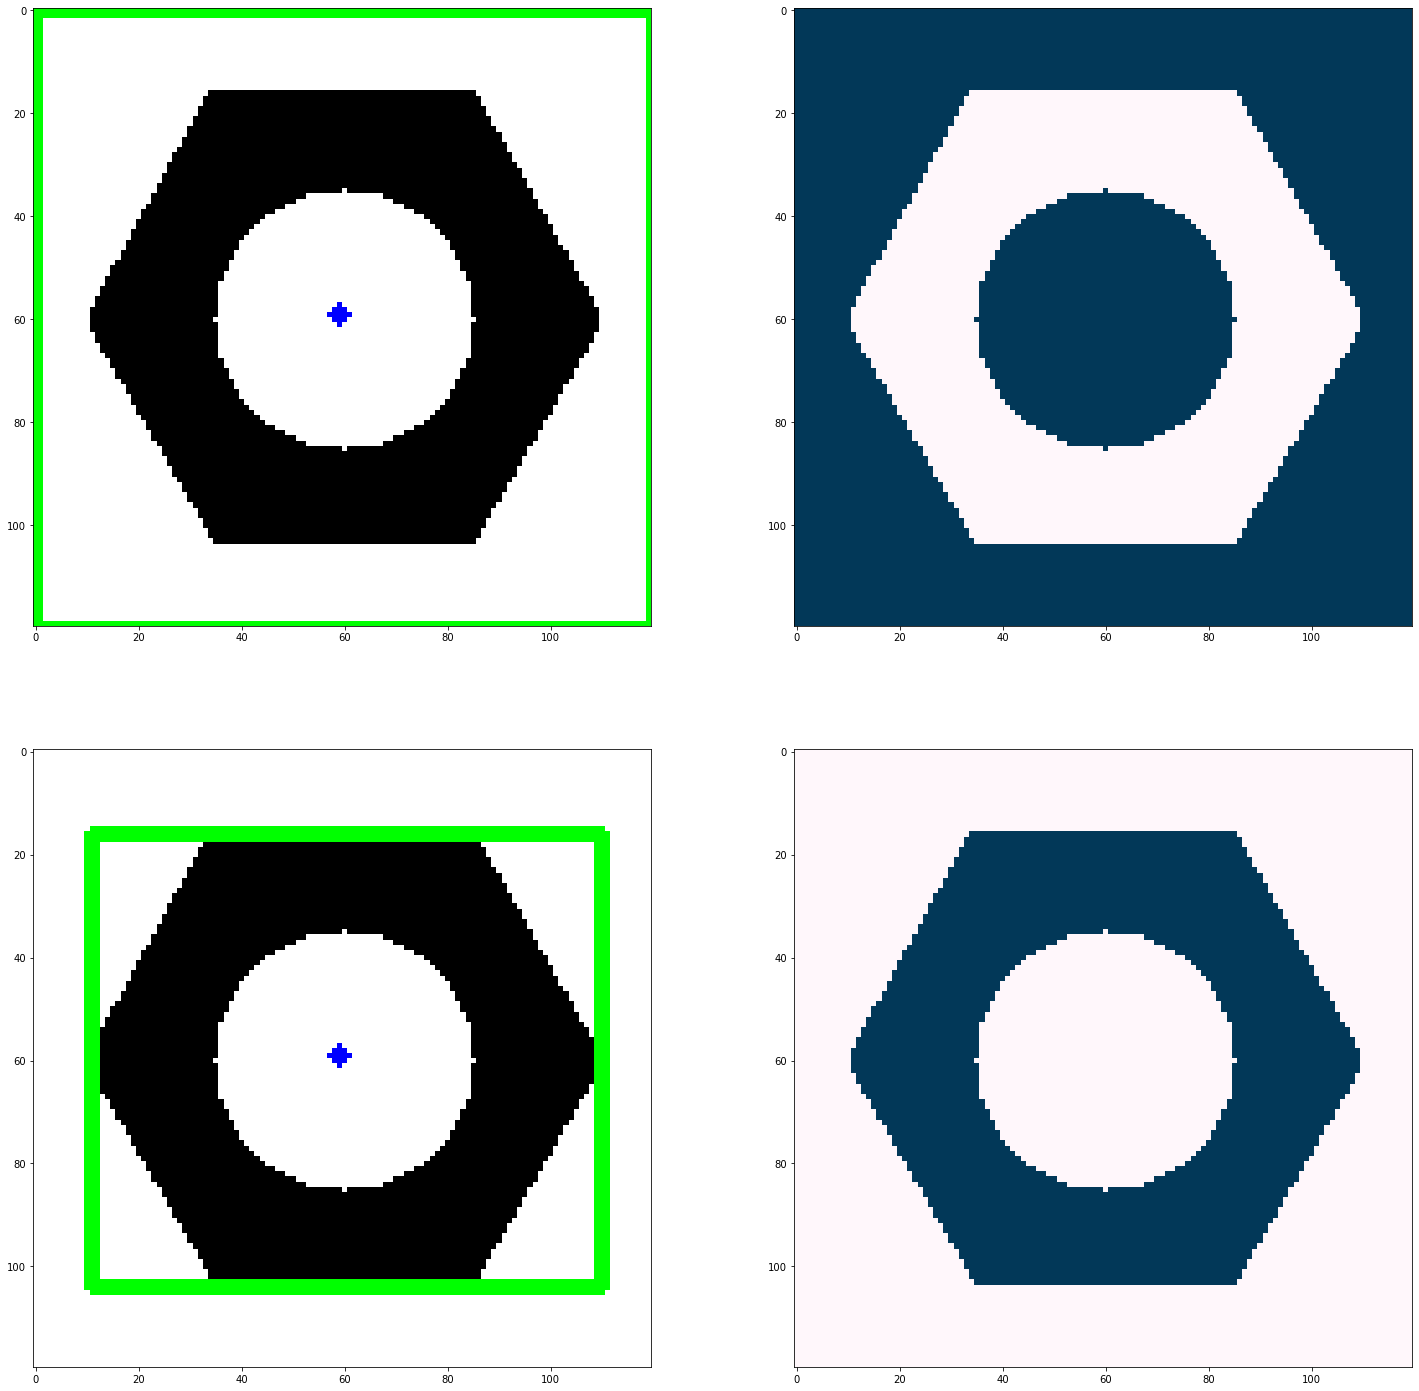

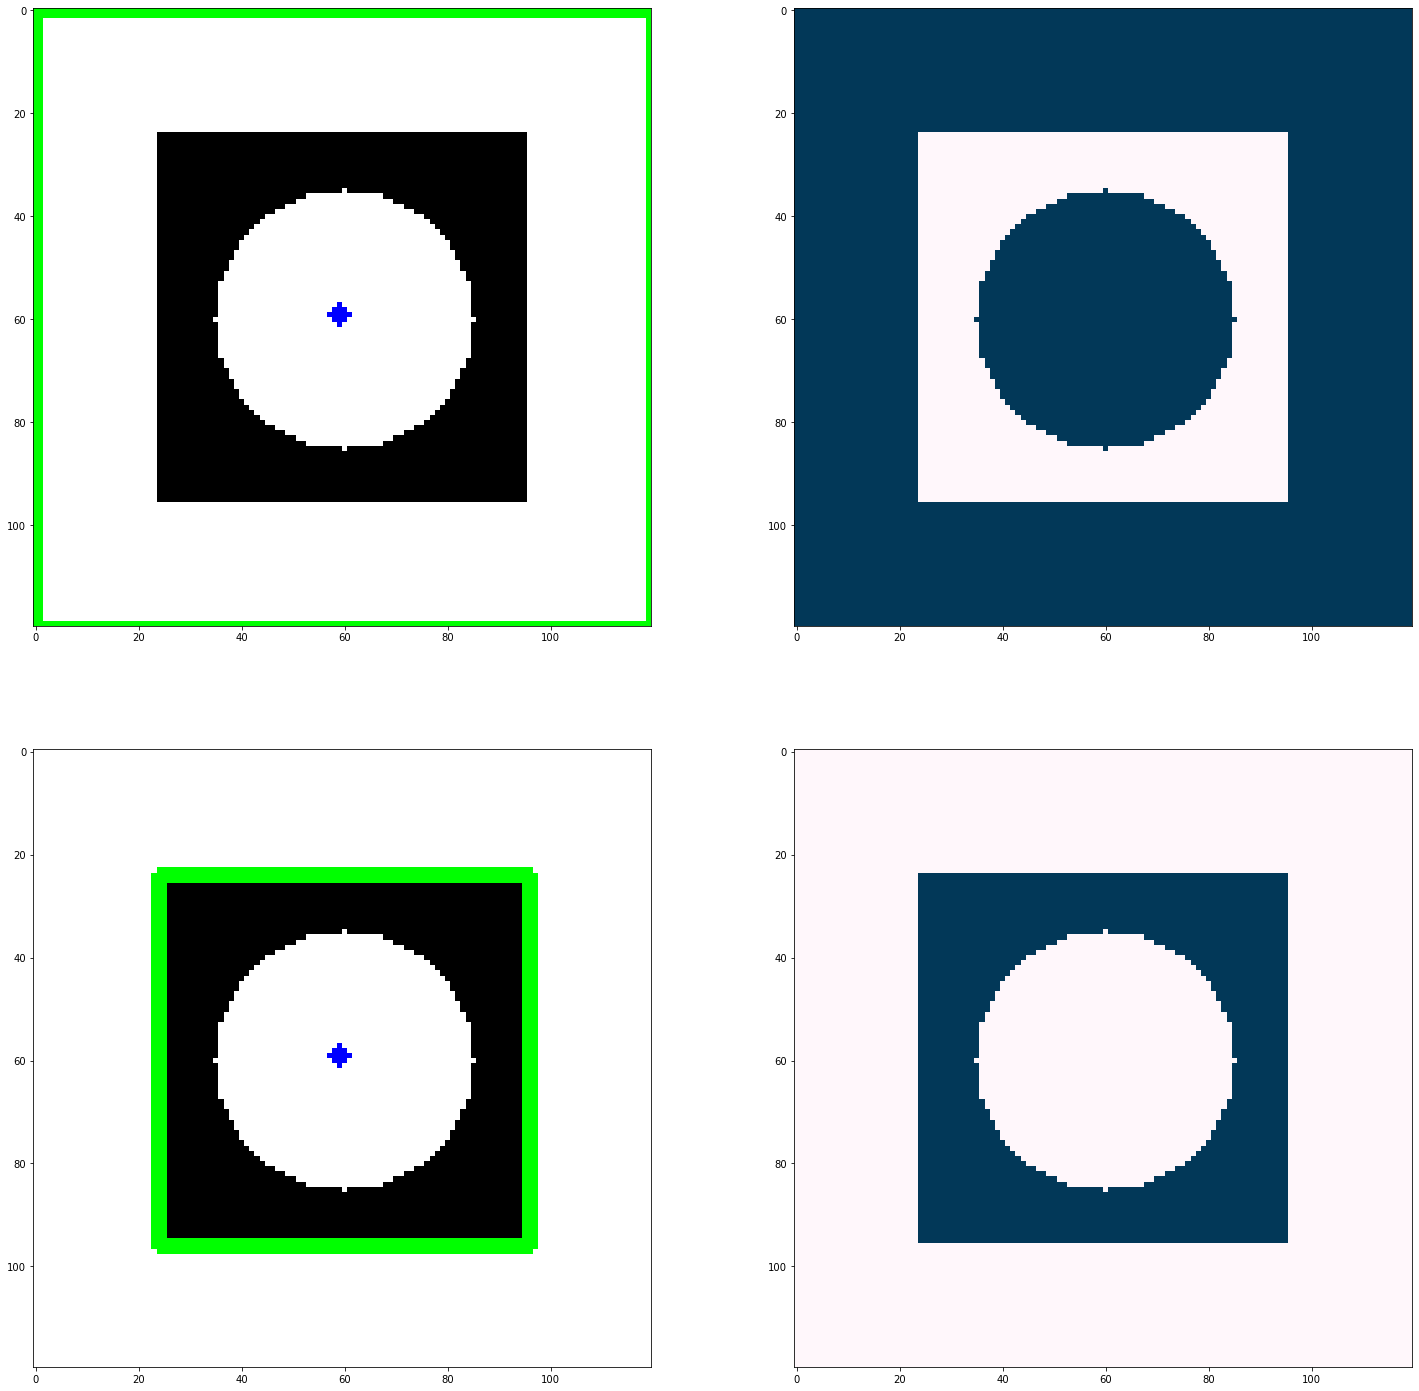

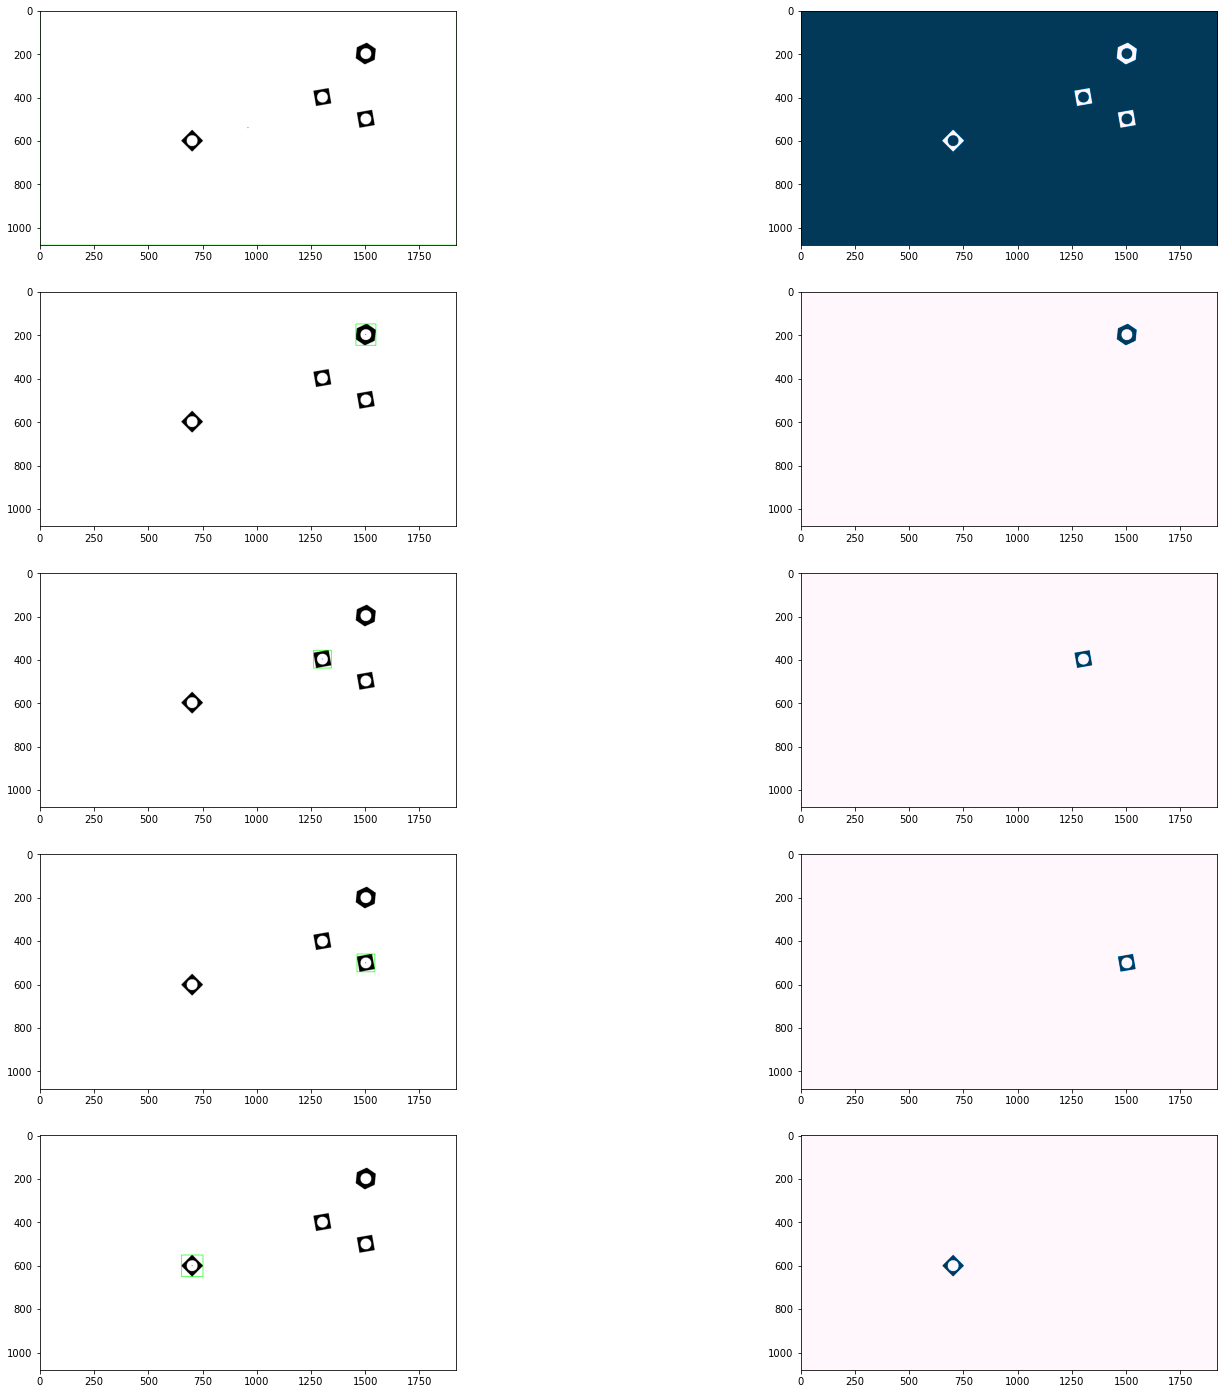

In [4]:
images_for_componentAnalysis = [hexnut_closed, squarenut_closed, conveyor_closed]
titles = ["Hexnut Template", "Squarenut Template", "Conveyor_f100"]

for j in range(len(images_for_componentAnalysis)):
    # You need to choose 4 or 8 for connectivity type
    connectivity = 4  
    # Perform the operation
    invert = cv.bitwise_not(images_for_componentAnalysis[j])
    output = cv.connectedComponentsWithStats(invert , connectivity, cv.CV_32S)
    # Get the results
    # The first cell is the number of labels
    num_labels = output[0]
    # The second cell is the label matrix
    labels = output[1]
    # The third cell is the stat matrix
    stats = output[2]
    # The fourth cell is the centroid matrix
    centroids = output[3]

    fig, ax = plt. subplots(num_labels,2,figsize = (25,25))
    print(titles[j])
    print("Number of connected components-", num_labels)

    for i in range(0, num_labels):
        x = stats[i, cv.CC_STAT_LEFT]
        y = stats[i, cv.CC_STAT_TOP]
        w = stats[i, cv.CC_STAT_WIDTH]
        h = stats[i, cv.CC_STAT_HEIGHT]
        area = stats[i, cv.CC_STAT_AREA]
        (cX, cY) = centroids[i]

        if(i == 0):
            print("Background", ':', 'Area:', area,'|', 'centroid:', (cX, cY))
        else:
            print("Component ",i, ':', 'Area:', area,'|', 'centroid:', (cX, cY))

        output = images_for_componentAnalysis[j].copy()
        output = cv.cvtColor(output , cv.COLOR_GRAY2BGR)
        cv.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv.circle(output, (int(cX), int(cY)), 2, (0, 0, 255), -1)

        componentMask = (labels == i).astype("uint8") * 255

        
        # show our output image and connected component mask
        ax[i][0].imshow(output)
        ax[i][1].imshow(componentMask, cmap = 'PuBu')
        


1.  Contour analysis: Use `findContours` function to retrieve the
    *extreme outer* contours. (see
    <https://docs.opencv.org/4.5.2/d4/d73/tutorial_py_contours_begin.html>
    for help and
    <https://docs.opencv.org/4.5.2/d3/dc0/group__imgproc__shape.html#gadf1ad6a0b82947fa1fe3c3d497f260e0>
    for information.

Display these contours. You should see something like the following:

<span class="image">extreme_outer_contours</span>


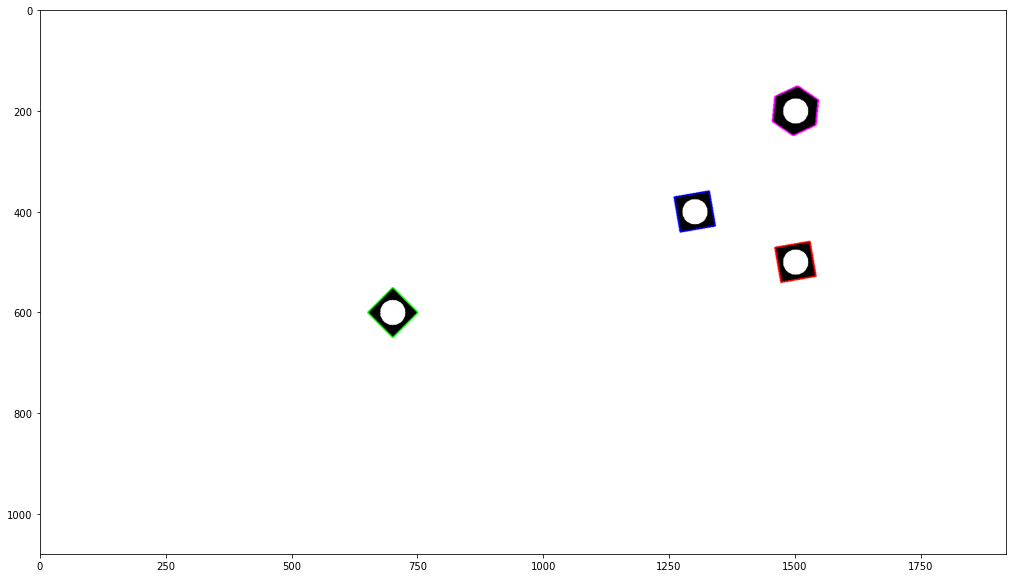

In [5]:
invert = cv.bitwise_not(conveyor_closed)
contours, hierarchy = cv.findContours(invert , mode=cv.RETR_EXTERNAL, method=cv.CHAIN_APPROX_NONE)
image_copy = conveyor_closed.copy()
colors = ((0,255,0), (255,0,0), (0,0,255), (255,0,255))

image_copy = cv.cvtColor(image_copy , cv.COLOR_GRAY2BGR)
for i in range(len(contours)):
    cv.drawContours(image=image_copy, contours=contours[i], contourIdx=-1, color=colors[i%4], thickness=2, lineType=cv.LINE_AA)

fig,ax = plt.subplots(figsize = (25,10))
ax.imshow(image_copy)
plt.show()

## Detecting Objects on a Synthetic Conveyor<a href="#Detecting-Objects-on-a-Synthetic-Conveyor" class="anchor-link">¶</a>

In this section, we will use the synthetic `conveyor.mp4` sequence to
count the two types of nuts.

1.  Open the sequence and play it using the code below.

In [6]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.



1.  Count the number of matching hexagonal nuts in `conveyor_f100.png`.
    You can use `matchCountours` function as shown in
    <https://docs.opencv.org/4.5.2/d5/d45/tutorial_py_contours_more_functions.html>
    to match contours in each frame with that in th template.


Number of matches: 1


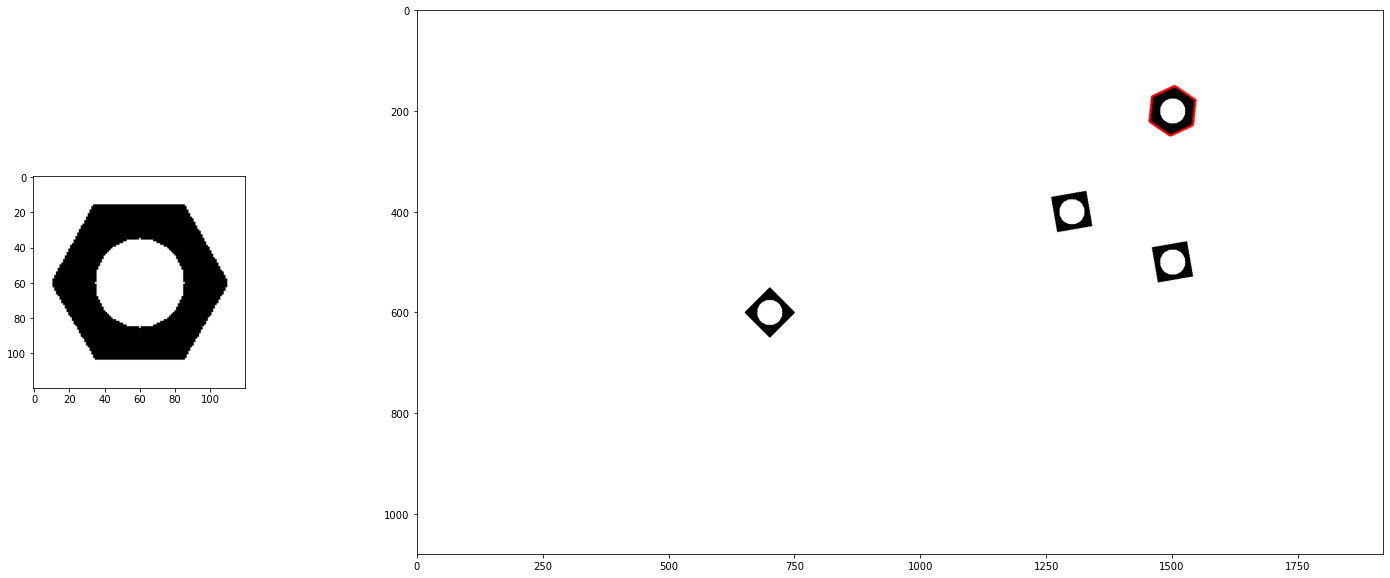

In [7]:
invert_2 = cv.bitwise_not(hexnut_closed)
contours_hex, hierarchy_hex = cv.findContours(invert_2 , mode=cv.RETR_EXTERNAL, method=cv.CHAIN_APPROX_NONE)

frame_1 = conveyor_closed
image_to_be_matched = contours_hex[0]

matches = 0
matched_contours = []

for i in contours:
    ret = cv.matchShapes(i, image_to_be_matched ,1,0.0)
    if (ret < 0.0001): 
        matches += 1
        matched_contours.append(i)

print("Number of matches:", matches)

image_copy = conveyor_closed.copy()
image_copy = cv.cvtColor(image_copy , cv.COLOR_GRAY2BGR)
for i in range(len(matched_contours)):
    cv.drawContours(image=image_copy, contours=matched_contours[i], contourIdx=-1, color= (255,0,0) , thickness=3, lineType=cv.LINE_AA)

fig,ax = plt.subplots(1,2, figsize = (25,10), gridspec_kw={'width_ratios': [1, 5]})
ax[0].imshow(cv.cvtColor(hexnut_closed , cv.COLOR_GRAY2BGR))
ax[1].imshow(image_copy)
plt.show()


1.  Count the number of objects that were conveyed along the conveyor
    belt: Display the count in the current frame and total count upto
    the current frame in the output video. Please compress your video
    (using Handbreak or otherwise) before uploading. It would be good to
    experiment first with the two adjacent frames `conveyor_f100.png`
    and `conveyor_f101.png`. In order to disregard partially appearing
    nuts, consider comparing the contour area in addition to using the
    `matchCountours` function.

In [8]:

cap = cv.VideoCapture('conveyor.mp4')

f = 0
frame = []    
tot_matches = 0
frame_array = []
initalizer = 0
initial_cord = []

while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    #matching hexnuts in the frame
    frame_gray = cv.cvtColor(frame , cv.COLOR_RGB2GRAY)
    ret_frame,th_frame = cv.threshold(frame_gray ,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
    
    kernel = np.ones((3,3),np.uint8)
    frame_closed = cv.morphologyEx(th_frame, cv.MORPH_CLOSE, kernel)

    invert = cv.bitwise_not(frame_closed)

    #connected component analysis
    connectivity = 4  
    output = cv.connectedComponentsWithStats(invert , connectivity, cv.CV_32S)
    num_labels = output[0]
    labels = output[1]
    stats = output[2]
    centroids = output[3]
    matches = 0
    matched_contours = []

    for i in range(1, num_labels):
        x = stats[i, cv.CC_STAT_LEFT]
        y = stats[i, cv.CC_STAT_TOP]
        w = stats[i, cv.CC_STAT_WIDTH]
        h = stats[i, cv.CC_STAT_HEIGHT]
        area = stats[i, cv.CC_STAT_AREA]
        (cX, cY) = centroids[i]
        

        componentMask = (labels == i).astype("uint8") * 255
        contours_mask, hierarchy_mask = cv.findContours(componentMask , mode=cv.RETR_EXTERNAL, method=cv.CHAIN_APPROX_NONE)


        image_to_be_matched = contours_hex[0]
    
    
        for i in contours_mask:
            ret = cv.matchShapes(i, image_to_be_matched ,1,0.0)
            if (ret < 0.001 and area > 4600): 
                matches += 1
                
                matched_contours.append(i)

                if(initalizer == 0):
                    initial_cord.append([cX,cY])
                    initalizer += 1

                
                if (cX < initial_cord[0][0]+3 and cX > initial_cord[0][0]-3):
                    
                    tot_matches += 1

    image_copy = frame_closed.copy()
    image_copy = cv.cvtColor(image_copy , cv.COLOR_GRAY2BGR)
    for i in range(len(matched_contours)):
        cv.drawContours(frame, contours=matched_contours[i], contourIdx=-1, color= (255,0,0) , thickness=3, lineType=cv.LINE_AA)

        
    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 50), cv.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 1, cv.LINE_AA)
    cv.putText(frame, "Matches in current frame:"+ str(matches) , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 1, cv.LINE_AA)
    cv.putText(frame, "Total matches:"+ str(tot_matches) , (100, 150), cv.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 1, cv.LINE_AA)
    frame_array.append(frame)
    

cap.release()


shape = (1080, 1920, 3)

# Your code here


out = cv.VideoWriter('./conveyor_result_190443T.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
 
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


In [9]:
hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)

conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)
conveyor_f101 =  cv.imread('conveyor_f101.png', cv.IMREAD_COLOR)

hexnut_gray = cv.cvtColor(hexnut_template, cv.COLOR_RGB2GRAY)
conveyor100_gray = cv.cvtColor(conveyor_f100, cv.COLOR_RGB2GRAY)
conveyor101_gray = cv.cvtColor(conveyor_f101, cv.COLOR_RGB2GRAY)

ret1,th1 = cv.threshold(hexnut_gray ,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret2,th2 = cv.threshold(conveyor100_gray ,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret3,th3 = cv.threshold(conveyor101_gray ,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

hexnut_closed = cv.morphologyEx(th1, cv.MORPH_CLOSE, kernel)
conveyor100_closed = cv.morphologyEx(th2, cv.MORPH_CLOSE, kernel)
conveyor101_closed = cv.morphologyEx(th3, cv.MORPH_CLOSE, kernel)

connectivity = 4  
# Perform the operation
invert = cv.bitwise_not(conveyor101_closed)
output = cv.connectedComponentsWithStats(invert , connectivity, cv.CV_32S)
# Get the results
# The first cell is the number of labels
num_labels = output[0]
# The second cell is the label matrix
labels = output[1]
# The third cell is the stat matrix
stats = output[2]
# The fourth cell is the centroid matrix
centroids = output[3]

for i in range(num_labels):
    x = stats[i, cv.CC_STAT_LEFT]
    y = stats[i, cv.CC_STAT_TOP]
    w = stats[i, cv.CC_STAT_WIDTH]
    h = stats[i, cv.CC_STAT_HEIGHT]
    area = stats[i, cv.CC_STAT_AREA]
    (cX, cY) = centroids[i]
    print("area:", area, " ", "(cx,cy) = ", (cX, cY))

area: 2059670   (cx,cy) =  (957.4336937470566, 540.4427194647686)
area: 4628   (cx,cy) =  (1489.2411408815904, 199.28435609334485)
area: 3083   (cx,cy) =  (1289.1819656179046, 399.18196561790467)
area: 3083   (cx,cy) =  (1489.1819656179046, 499.18196561790467)
area: 3136   (cx,cy) =  (690.0, 600.0)
